In [1]:
import os
import sys

def prepare_dev_stationary():

    global DEV
    global DEV_DATA
    try:
        test_ipython = str(get_ipython())
    except NameError:
        print('Running on local environment')
        DEV = os.getcwd()
    else:
        if 'google.colab' in test_ipython:
            print('Running on CoLab')
            from google.colab import drive
            drive.mount('/content/drive')
            cmd = "pip install -U keras-tuner"
            os.system(cmd)
            DEV = '/content/drive/MyDrive/Python/sunday'
        elif 'ipykernel' in test_ipython:
            print('Running on Jupyter Notebook')
            DEV = os.getcwd()
    sys.path.append(DEV)
    path_head = os.path.split(DEV)[0]
    DEV_DATA = os.path.join(path_head, 'sunday_show/')
    pass

prepare_dev_stationary()

Running on Jupyter Notebook


In [2]:
import pytz
import numpy as np
import datetime
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tsdataparams import DatasetParams
from datamodels import TSModel
import tensorflow as tf
print(f'Tensorflow version {tf.__version__}')

timezone = pytz.timezone("Europe/Moscow")
__version__ = 0.0004
print(DEV)
print(DEV_DATA)
# Рисовать графики сразу же
%matplotlib inline

Tensorflow version 2.6.2
/home/cubecloud/Python/projects/sunday_show
/home/cubecloud/Python/projects/sunday_show/


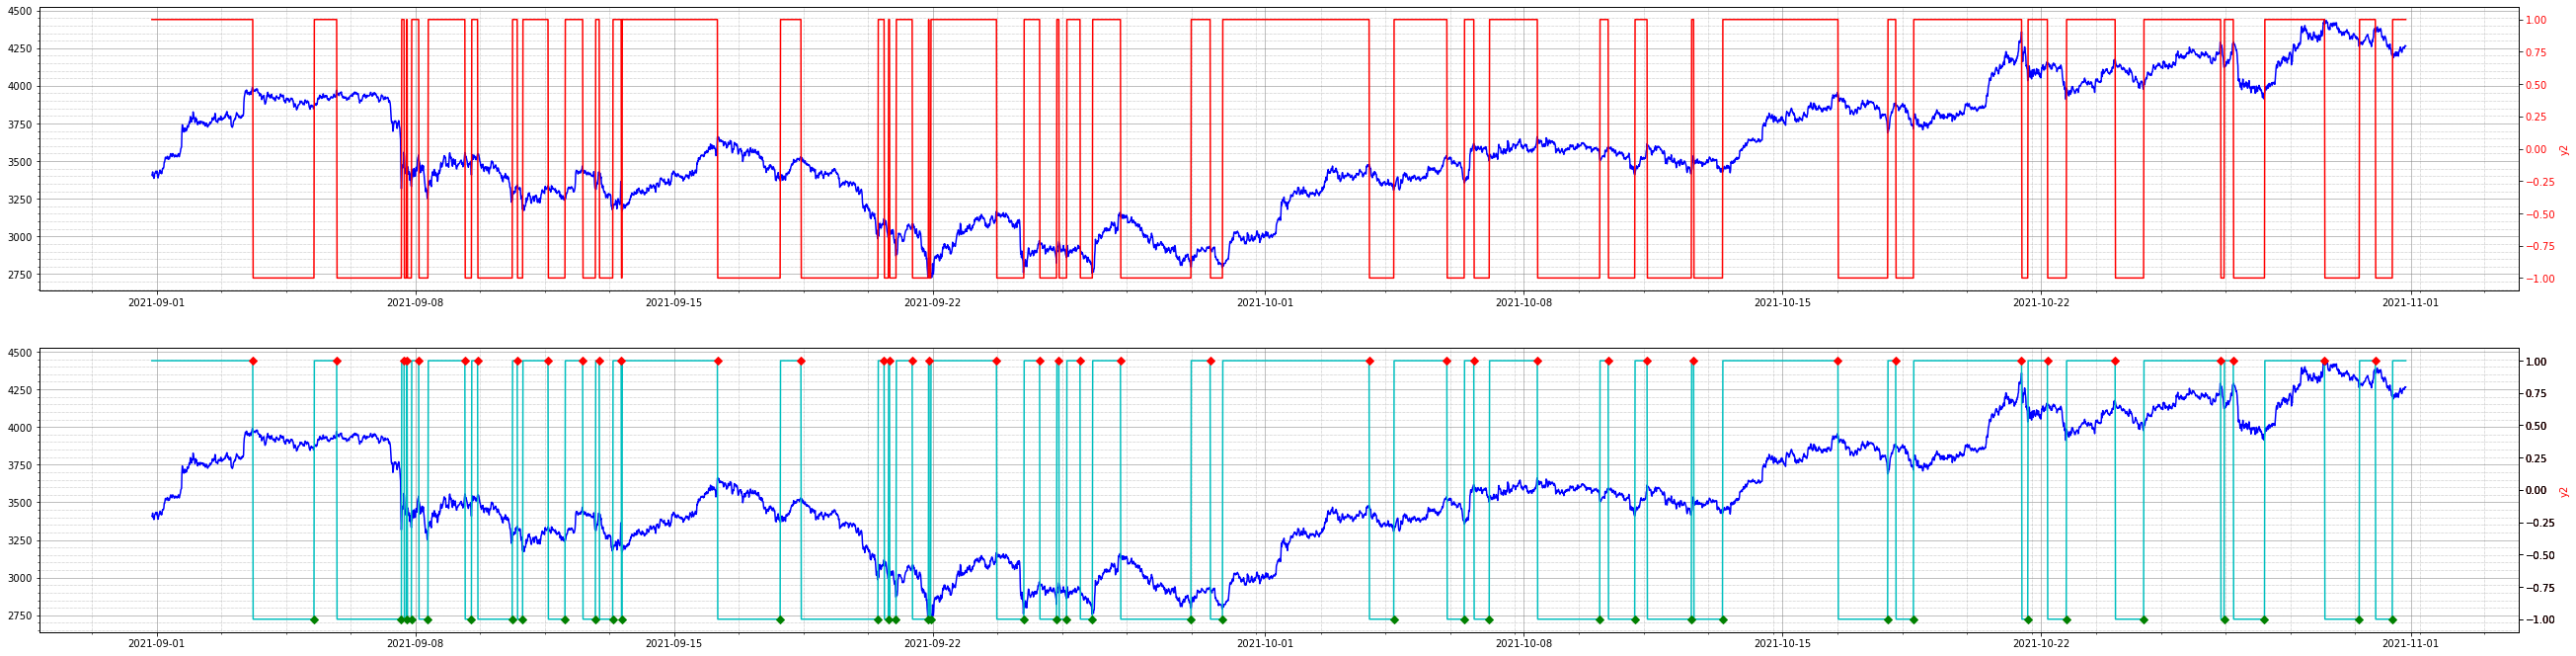

In [4]:
timezone = pytz.timezone("Europe/Moscow")
pd.set_option('display.max_colwidth', None)
pair_symbol = "ETHUSDT"

ds = TSModel(dataset_period=('2021-08-31 20:59:59.000',
                             '2021-10-31 20:59:59.000'),
             data_path=DEV_DATA,
             )

ds.compile(use_intervals=("15m", "1h"),
           use_trend_weights=(0.15, 0.075, 0.055, 0.055/2),
           )

data_df = ds.data_storage['ETHUSDT']['15m']['raw_df']
trend_df = ds.data_storage['ETHUSDT']['15m']['trend_df'][0.055/2]
data_df["trend"] = trend_df["trend"]
_ = ds.show_trend_buy_sell_points(data_df, show=True)


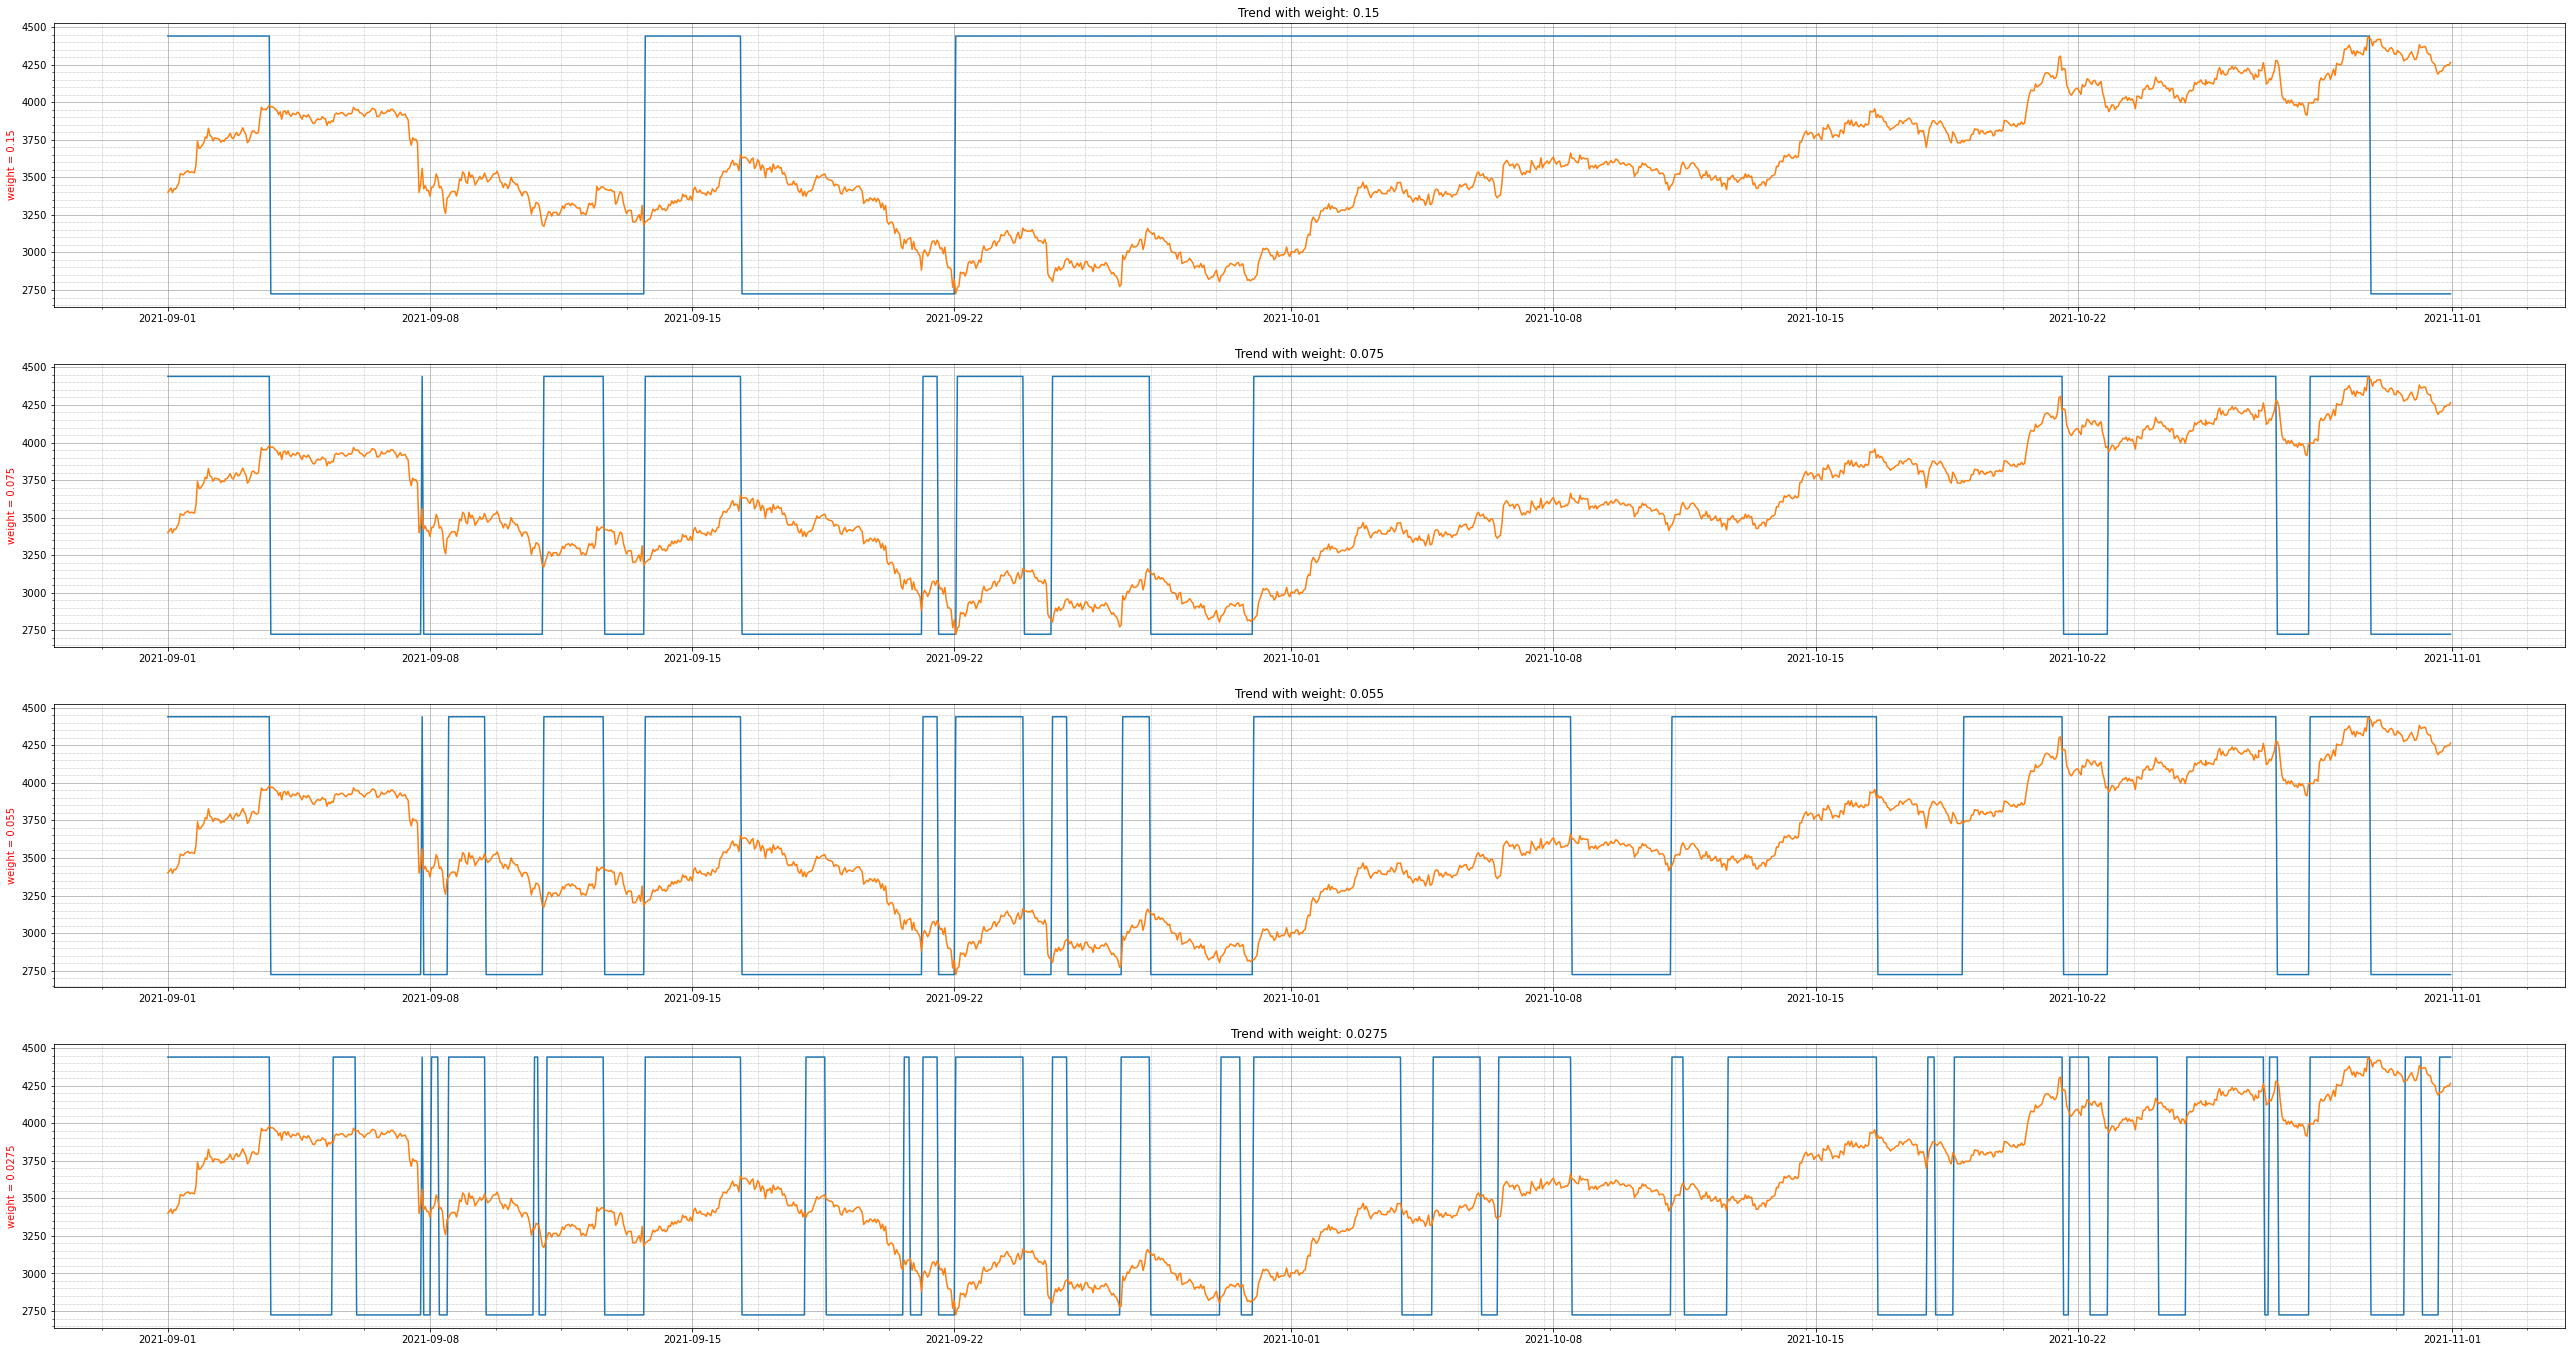

In [7]:
pair_symbol = "ETHUSDT"
ds.check_trends_weights(pair_symbol=pair_symbol,
                        time_interval="1h",
                        )

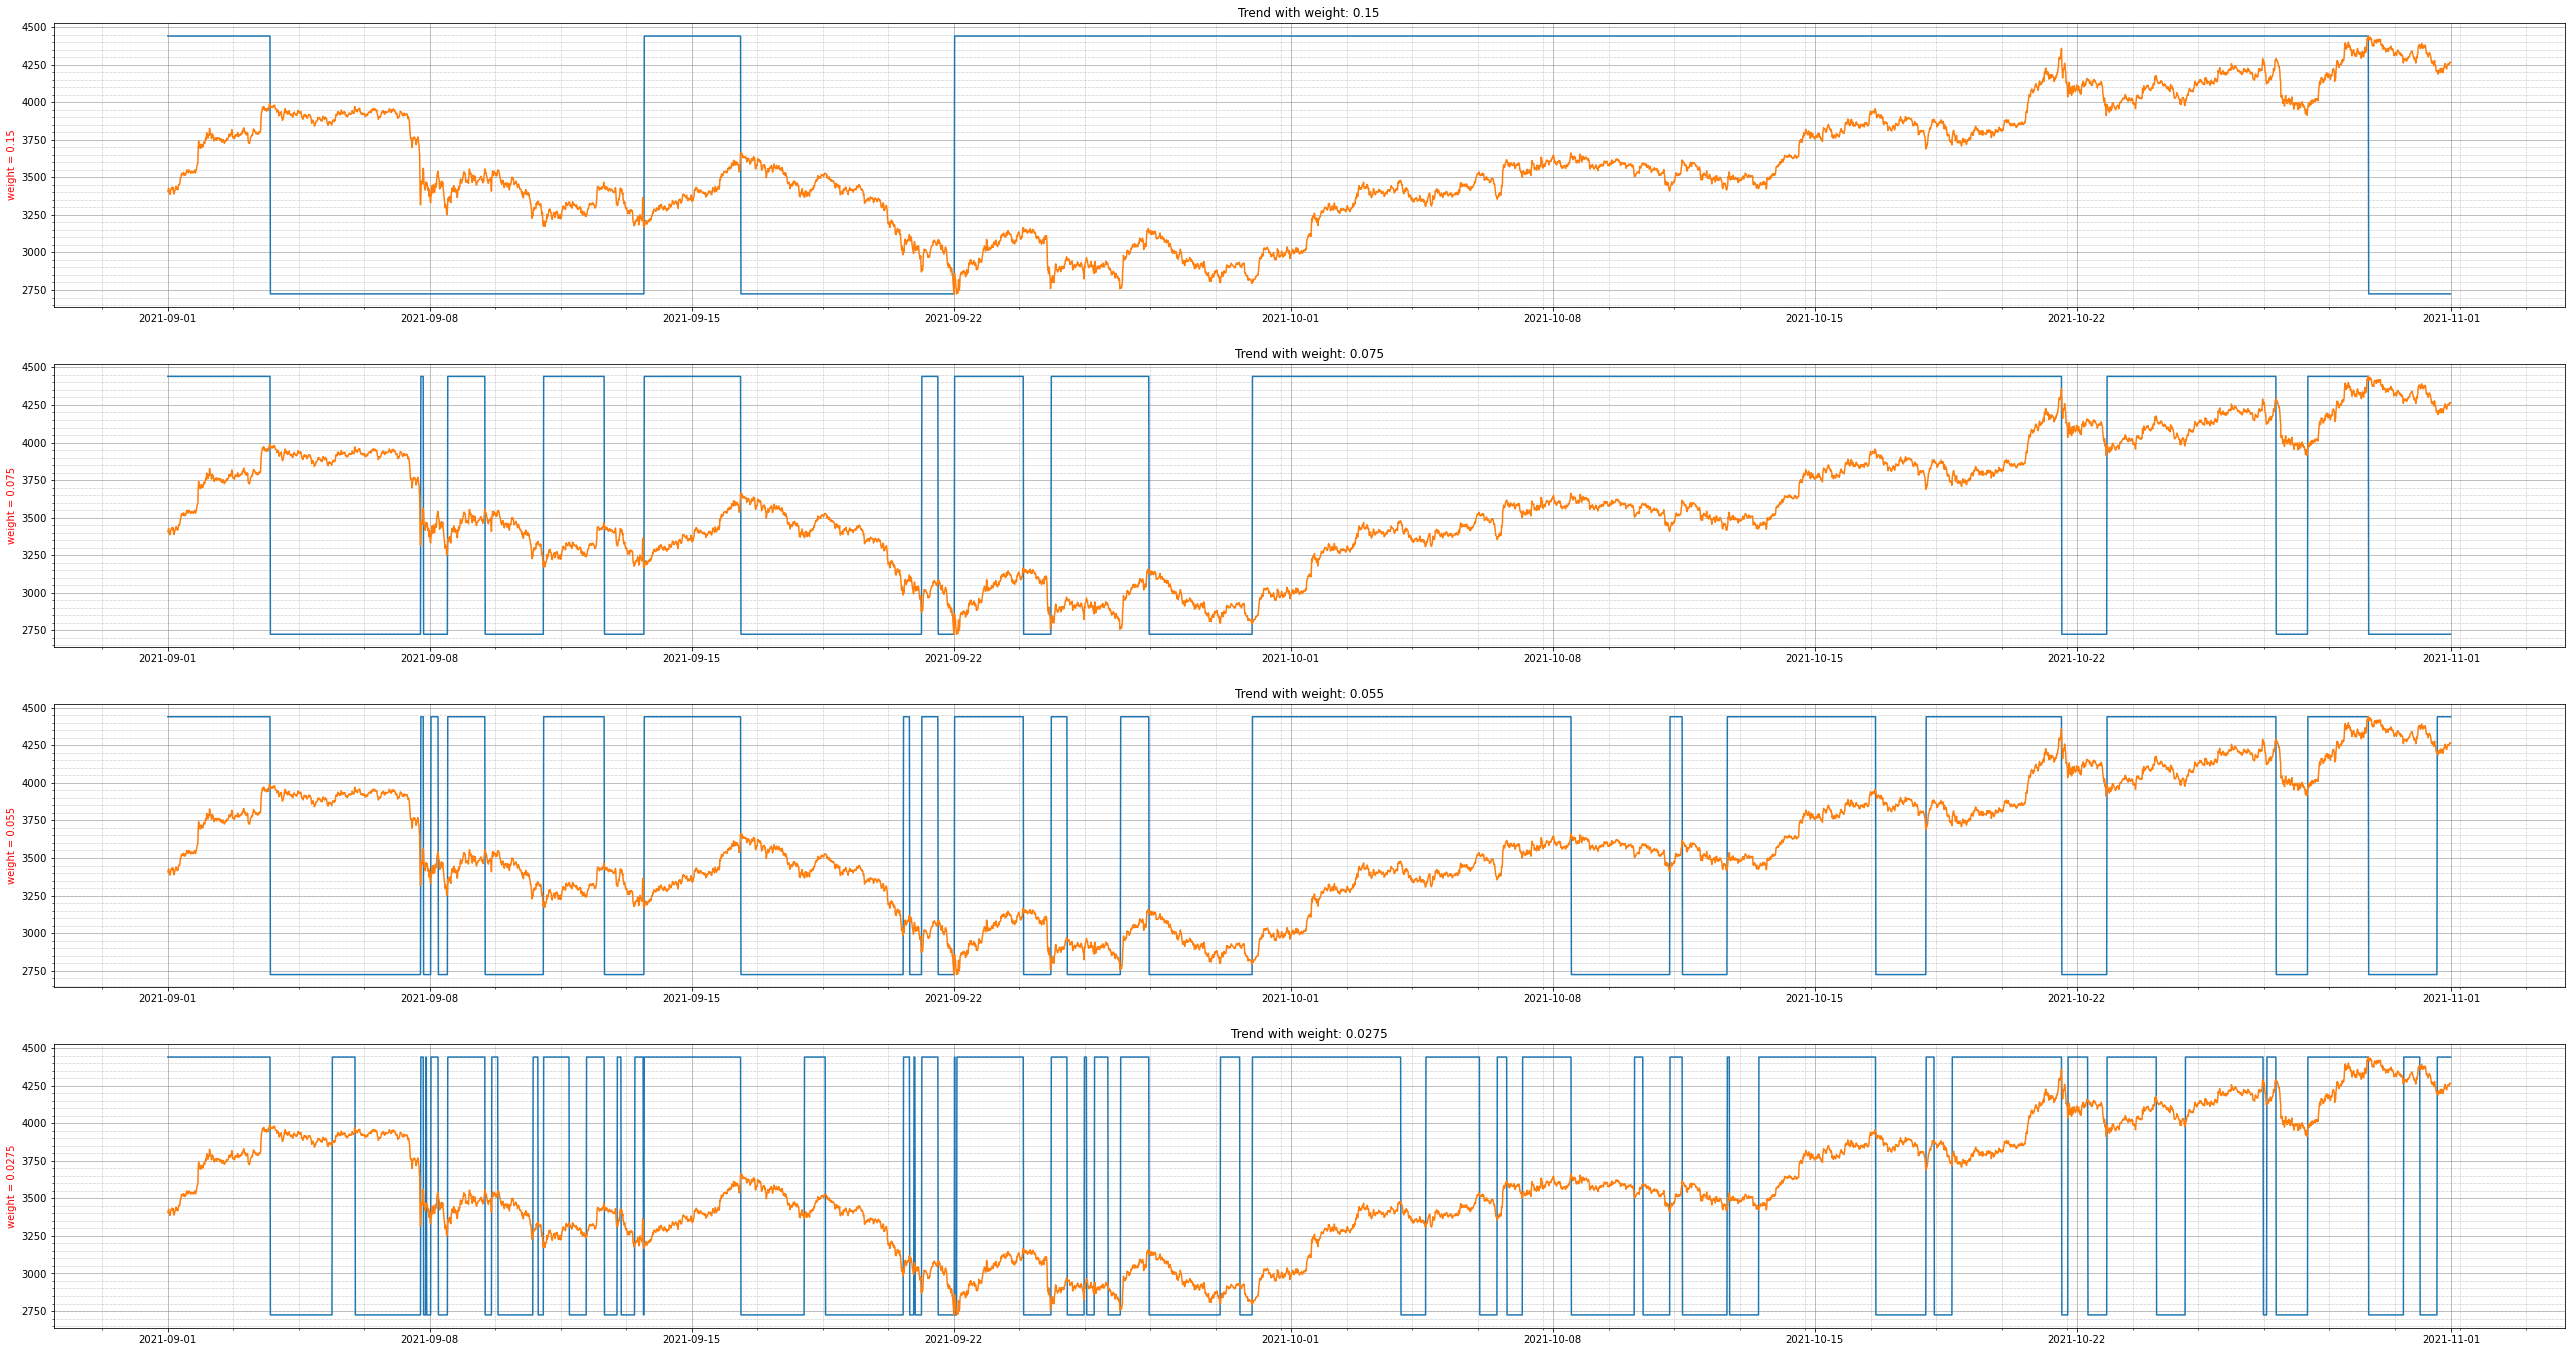

In [8]:
pair_symbol = "ETHUSDT"
ds.check_trends_weights(pair_symbol=pair_symbol,
                        time_interval="15m",
                        )